# Sklearn


The most commonly used package for machine learning in Python is undoubtedly Sklearn, so let's see how to do a linear regression here.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
from jupyterthemes import jtplot
jtplot.style()

In [3]:
data = pd.read_csv("Advertising.csv")

In [4]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
X = data.drop('Sales', axis = 1).values
y = data['Sales'].values

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [8]:
model = LinearRegression()

In [9]:
model.fit(X_train, y_train)

LinearRegression()

In [10]:
y_pred = model.predict(X_test)

In [11]:
y_test, y_pred

(array([ 8. , 19.8, 23.8, 18.9, 10.6, 24.7,  6.9, 15.5, 14.7,  9.7, 11.3,
        22.1, 10.6, 14.6,  7.6, 17.4,  9.7, 15.9, 11.8, 14.4, 11.7, 15.7,
         9.7,  9.3, 17.1, 15.2, 20.7, 10.9, 14.9, 10.5, 11. , 13.2, 17. ,
        13.6, 10.8,  9.3, 22.2, 15.5, 21.7, 22.6]),
 array([10.70479508, 19.58684519, 21.89976948, 18.8763363 ,  8.9623014 ,
        22.19814145,  4.25599526, 15.22139022, 14.62937001,  8.01567896,
         9.79285638, 20.55269685,  8.72075701, 15.25279795,  5.14598868,
        18.73240182,  7.95150855, 18.507079  , 11.61175991, 14.1012339 ,
        12.02703548, 16.67860849,  8.61968137,  7.62762518, 17.149369  ,
        15.13708722, 19.59008348,  9.31261836, 15.06374407,  9.01199263,
         9.74270527, 11.96537989, 17.21710021, 14.36187704, 11.80268826,
        12.29497125, 21.26431274, 14.34004264, 20.75814812, 20.7584395 ]))

In [12]:
model.score(X_train, y_train)

0.8945549475283131

In [13]:
model.score(X_test, y_test)

0.9051884713838586

In [14]:
model.coef_

array([0.04606925, 0.19140075, 0.00070856])

In [15]:
model.intercept_

2.6681825479022105

## Feature Selection

Feature selection is one of the first and important steps while performing any machine learning task. If we add these irrelevant features in the model, it will just make the model worst (Garbage In Garbage Out). This gives rise to the need of doing feature selection.


Feature selection can be done in multiple ways but there are broadly 3 categories of it:

1. Filter Method
2. Wrapper Method

In [16]:
names = [ 'CRIM',  
 'ZN',    
 'INDUS', 
 'CHAS',  
 'NOX',   
 'RM',    
 'AGE',   
 'DIS',   
 'RAD',   
 'TAX',   
 'PTRATIO',  
 'B',
 'LSTAT', 
 'MEDV']

In [17]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None, names = names)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [18]:
raw_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.00,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,NaN,NaN,NaN
1,396.90000,4.98,24.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.02731,0.00,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,NaN,NaN,NaN
3,396.90000,9.14,21.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.02729,0.00,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1007,396.90000,5.64,23.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1008,0.10959,0.00,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,NaN,NaN,NaN
1009,393.45000,6.48,22.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1010,0.04741,0.00,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,NaN,NaN,NaN


In [19]:
with open('boston.txt', 'r') as file:
    lines = file.readlines()

FileNotFoundError: [Errno 2] No such file or directory: 'boston.txt'

In [20]:
len(lines)

NameError: name 'lines' is not defined

In [21]:
clear_data = []

In [22]:
for pares, impares in zip(range(0, len(lines), 2), range(1, len(lines) + 1, 2)):
    clear_data.append(lines[pares] + lines[impares])

NameError: name 'lines' is not defined

In [23]:
clear_data = [','.join(l.split()) for l in clear_data]

In [24]:
clear_data.insert(0, ','.join(names))

In [25]:
clear_data;

In [26]:
len(clear_data[:-1])

0

In [27]:
with open('boston_clear.txt', 'w') as file:
    for l in clear_data[:-1]:
        file.write(l + '\n')
        
    file.write(clear_data[-1])

In [28]:
data = pd.read_csv('boston_clear.txt')

In [29]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV


In [30]:
data.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   CRIM     0 non-null      object
 1   ZN       0 non-null      object
 2   INDUS    0 non-null      object
 3   CHAS     0 non-null      object
 4   NOX      0 non-null      object
 5   RM       0 non-null      object
 6   AGE      0 non-null      object
 7   DIS      0 non-null      object
 8   RAD      0 non-null      object
 9   TAX      0 non-null      object
 10  PTRATIO  0 non-null      object
 11  B        0 non-null      object
 12  LSTAT    0 non-null      object
 13  MEDV     0 non-null      object
dtypes: object(14)
memory usage: 0.0+ bytes


In [32]:
X = data.drop('MEDV', axis = 1).values.copy()
y = data['MEDV'].values.copy()

## Filter Method

As the name suggest, in this method, you filter and take only the subset of the relevant features. The model is built after selecting the features. The filtering here is done using correlation matrix and it is most commonly done using Pearson correlation.

Here we will first plot the Pearson correlation heatmap and see the correlation of independent variables with the output variable MEDV. We will only select features which has correlation of above 0.5 (taking absolute value) with the output variable.

ValueError: zero-size array to reduction operation fmin which has no identity

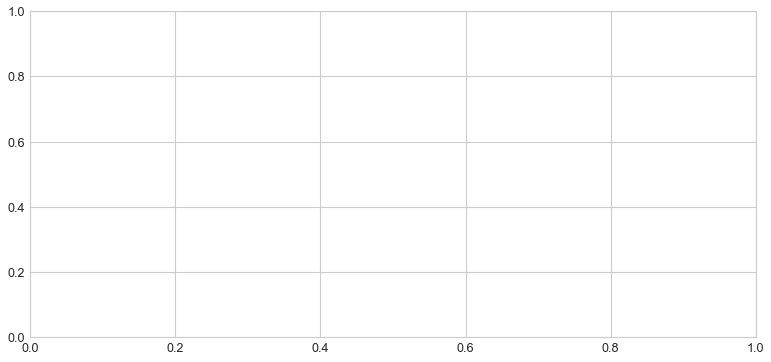

In [33]:
fig, ax = plt.subplots(figsize = (13, 6))

corr = data.corr()

sns.heatmap(corr, annot = True, ax = ax);

In [34]:
mask = corr['MEDV'].abs() > 0.5
relevant_features = corr['MEDV'][mask]

KeyError: 'MEDV'

In [35]:
relevant_features

NameError: name 'relevant_features' is not defined

In [36]:
data2 = data.loc[:, relevant_features.index]

NameError: name 'relevant_features' is not defined

In [37]:
x = data2.drop('MEDV', axis = 1)

NameError: name 'data2' is not defined

In [38]:
x

NameError: name 'x' is not defined

**Don't forget Multicollinearity**

In [90]:
def vif(X):
    
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
    
    return vif_data

In [91]:
vif(x)

,feature,VIF
0,RM,36.068093
1,PTRATIO,51.797351
2,LSTAT,5.855408


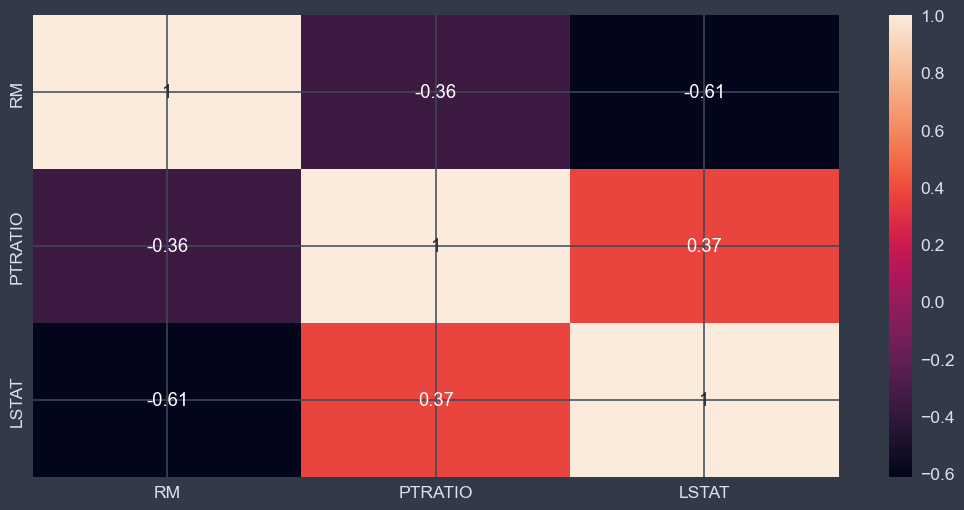

In [92]:
fig, ax = plt.subplots(figsize = (13, 6))
sns.heatmap(x.corr(), annot=True);

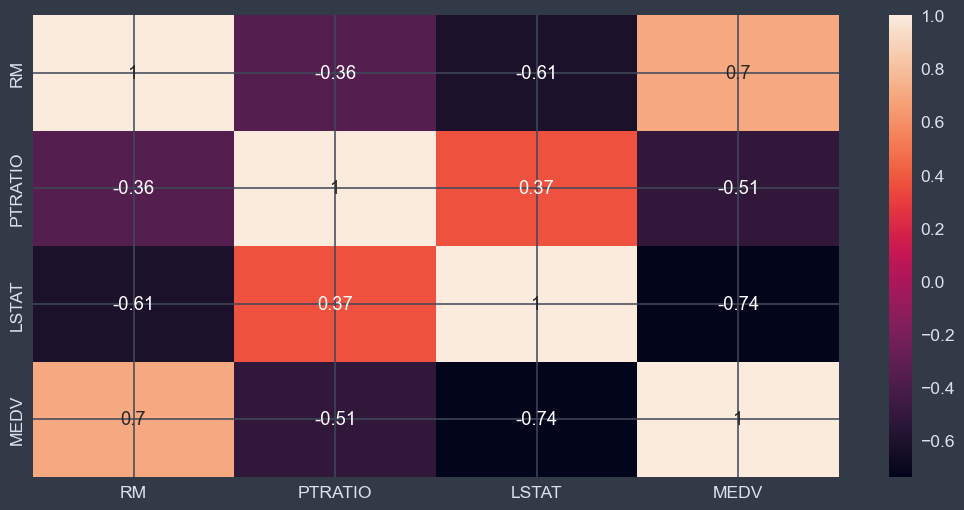

In [93]:
fig, ax = plt.subplots(figsize = (13, 6))
sns.heatmap(data2.corr(), annot=True);

In [96]:
x.drop('PTRATIO', axis = 1, inplace = True)

In [97]:
vif(x)

,feature,VIF
0,RM,3.253351
1,LSTAT,3.253351


In [98]:
model = LinearRegression()

In [99]:
model.fit(x, y)

LinearRegression()

In [100]:
model.score(x, y)

0.6385616062603404

## Wrapper Method:


A wrapper method needs one machine learning algorithm and uses its performance as evaluation criteria. This means, you feed the features to the selected Machine Learning algorithm and based on the model performance you add/remove the features. This is an iterative and computationally expensive process but it is more accurate than the filter method.

#### Backward Elimination

As the name suggest, we feed all the possible features to the model at first. We check the performance of the model and then iteratively remove the worst performing features one by one till the overall performance of the model comes in acceptable range.

The performance metric used here to evaluate feature performance is pvalue. If the pvalue is above 0.05 then we remove the feature, else we keep it.

In [39]:
data3 = data.copy()

In [40]:
model_string = 'MEDV~' + '+'.join(data3.drop('MEDV', axis = 1).columns)

In [41]:
model = smf.ols(formula = model_string, data = data3).fit()

ValueError: negative dimensions are not allowed

In [133]:
model.pvalues.sort_values(ascending = False)

CHAS         1.551469e-03
CRIM         1.010438e-03
ZN           7.542759e-04
B            5.565743e-04
TAX          5.214237e-04
RAD          2.996799e-06
NOX          1.209413e-06
Intercept    2.727265e-12
PTRATIO      9.235063e-13
DIS          6.837043e-15
RM           2.889779e-19
LSTAT        2.140586e-25
dtype: float64

In [134]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     128.2
Date:                Sat, 09 Mar 2024   Prob (F-statistic):          5.54e-137
Time:                        13:03:34   Log-Likelihood:                -1498.9
No. Observations:                 506   AIC:                             3022.
Df Residuals:                     494   BIC:                             3072.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.3411      5.067      7.171      0.000      26.385      46.298
CRIM          -0.1084      0.033     -3.307      0.001      -0.173      -0.044
ZN             0.0458      0.014      3.390      0.001       0.019       0.072
CHAS           2.7187      0.854      3.183      0.002       1.040       4.397
NOX          -17.3760      3.535     -4.915      0.000     -24.322     -10.430
RM             3.8016      0.406      9.356      0.000       3.003       4.600
DIS           -1.4927      0.186     -8.037      0.000      -1.858      -1.128
RAD            0.2996      0.063      4.726      0.000       0.175       0.424
TAX           -0.0118      0.003     -3.493      0.001      -0.018      -0.005
PTRATIO       -0.9465      0.129     -7.334      0.000      -1.200      -0.693
B              0.0093      0.003      3.475      0.001       0.004       0.015
LSTAT         -0.5226      0.047    -11.019      0.000      -0.616      -0.429
==============================================================================
Omnibus:                      178.430   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              787.785
Skew:                           1.523   Prob(JB):                    8.60e-172
Kurtosis:                       8.300   Cond. No.                     1.47e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [135]:
model.pvalues.nlargest(1).index

Index(['CHAS'], dtype='object')

In [130]:
data3.drop(model.pvalues.nlargest(1).index, axis = 1, inplace = True)

In [153]:
data3.drop('B', axis = 1, inplace = True)

In [154]:
x = data3.drop('MEDV', axis = 1)

In [155]:
vif(x)

,feature,VIF
0,CRIM,2.062183
1,ZN,2.254764
2,CHAS,1.109375
3,RM,11.760252
4,DIS,8.421839
5,RAD,4.298665
6,LSTAT,5.149899


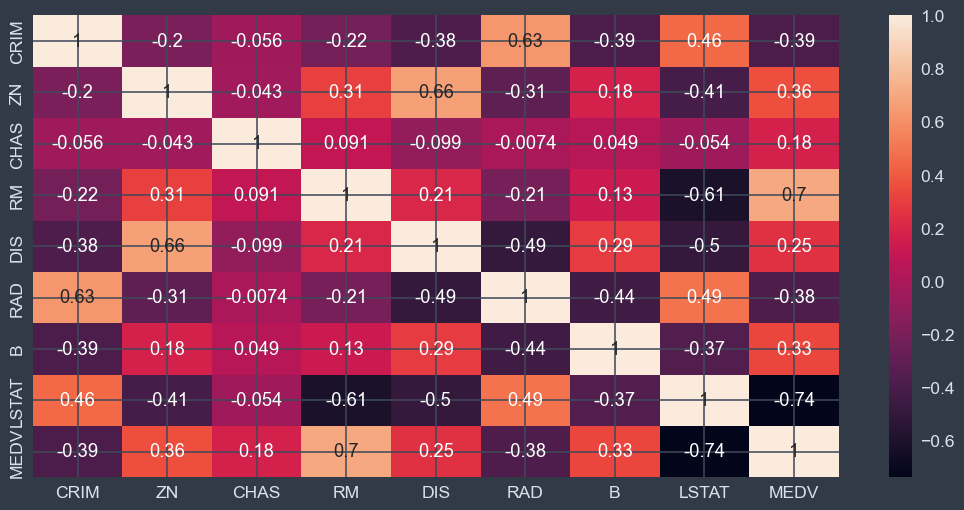

In [152]:
fig, ax = plt.subplots(figsize = (13, 6))
sns.heatmap(data3.corr(), annot=True);

In [156]:
model = LinearRegression()

In [157]:
model.fit(x, y)

LinearRegression()

In [158]:
model.score(x, y)

0.6854430032074675

In [42]:
import statsmodels.api as sm
import pandas as pd

def eliminar_variables_no_significativas(X, y, nivel_significancia=0.05):
    """
    Elimina las variables no significativas de un modelo de regresión lineal.

    Parámetros:
    - X: DataFrame de variables independientes.
    - y: Serie de la variable dependiente.
    - nivel_significancia: Nivel de significancia para considerar las variables.

    Retorna:
    - DataFrame con las variables significativas.
    """
    # Añadir constante al DataFrame de variables independientes
    X_con_intercepto = sm.add_constant(X)

    # Ajustar modelo de regresión lineal
    modelo = sm.OLS(y, X_con_intercepto).fit()

    # Obtener p-values
    p_values = modelo.pvalues

    # Filtrar variables significativas
    variables_significativas = X.columns[p_values[1:] < nivel_significancia]

    # Crear nuevo DataFrame con las variables significativas
    X_significativas = X[variables_significativas]

    return X_significativas

# Ejemplo de uso
# Supongamos que tenemos un DataFrame X con variables independientes y una Serie y con la variable dependiente
X = pd.DataFrame({
    'Variable1': [1, 2, 3, 4, 5],
    'Variable2': [2, 4, 5, 4, 5],
    'Variable3': [5, 4, 3, 2, 1]
})

y = pd.Series([10, 20, 30, 40, 50])

# Eliminar variables no significativas
X_significativas = eliminar_variables_no_significativas(X, y)

# Mostrar el nuevo DataFrame con variables significativas
print(X_significativas)

   Variable1  Variable3
0          1          5
1          2          4
2          3          3
3          4          2
4          5          1


C:\Users\maria\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


As we can see that the variable `AGE` has highest pvalue of 0.958 which is greater than 0.05. Hence we will remove this feature and build the model once again. 

#### RFE (Recursive Feature Elimination)

The Recursive Feature Elimination (RFE) method works by recursively removing attributes and building a model on those attributes that remain. It uses accuracy metric to rank the feature according to their importance. The RFE method takes the model to be used and the number of required features as input. It then gives the ranking of all the variables, 1 being most important. It also gives its support, True being relevant feature and False being irrelevant feature.

In [159]:
from sklearn.feature_selection import RFE

In [160]:
model = LinearRegression()

In [161]:
rfe = RFE(model, n_features_to_select = 7)

In [162]:
X_rfe = rfe.fit_transform(X, y)

In [163]:
X_rfe

array([[ 0.   ,  0.538,  6.575, ...,  1.   , 15.3  ,  4.98 ],
       [ 0.   ,  0.469,  6.421, ...,  2.   , 17.8  ,  9.14 ],
       [ 0.   ,  0.469,  7.185, ...,  2.   , 17.8  ,  4.03 ],
       ...,
       [ 0.   ,  0.573,  6.976, ...,  1.   , 21.   ,  5.64 ],
       [ 0.   ,  0.573,  6.794, ...,  1.   , 21.   ,  6.48 ],
       [ 0.   ,  0.573,  6.03 , ...,  1.   , 21.   ,  7.88 ]])

In [164]:
X_rfe.shape

(506, 7)

In [165]:
model.fit(X_rfe, y)

LinearRegression()

In [166]:
model.score(X_rfe, y)

0.7171450343413888

In [167]:
rfe.support_

array([False, False, False,  True,  True,  True, False,  True,  True,
       False,  True, False,  True])

In [168]:
rfe.ranking_

array([2, 4, 3, 1, 1, 1, 7, 1, 1, 5, 1, 6, 1])

Here we took LinearRegression model with 7 features and RFE gave feature ranking as above, but the selection of number ‘7’ was random. Now we need to find the optimum number of features, for which the accuracy is the highest. We do that by using loop starting with 1 feature and going up to 13. We then take the one for which the accuracy is highest.

In [170]:
X.shape

(506, 13)

In [171]:
nof = 0
score_list = []

for n in range(1, X.shape[1] + 1):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    model = LinearRegression()
    rfe = RFE(model, n_features_to_select=n)
    
    X_train_rfe = rfe.fit_transform(X_train, y_train)
    X_test_rfe  = rfe.transform(X_test)
    
    model.fit(X_train_rfe, y_train)
    score = model.score(X_test_rfe, y_test)
    score_list.append(score)
    
    if score == max(score_list):
        nof = n
    

In [172]:
nof

11

In [173]:
model = LinearRegression()
rfe = RFE(model, n_features_to_select=nof)

In [174]:
X_rfe = rfe.fit_transform(X, y)

In [175]:
model.fit(X_rfe, y)

LinearRegression()

In [176]:
model.score(X_rfe, y)

0.7342674984601645

# Categorical Variables

So far our model has the following form, but this assumes that all variables take numerical values.

$$y = w_0 + w_1 x_1 + w_2 x_2 + \cdots + w_n x_n$$


But if one of the variables $x_k$ is categorical we need to define a dummy variable.


$$
x_k
=
\left\{
\begin{matrix}
1 & \text{male}\\
0 & \text{female}\\
\end{matrix}
\right.
$$

An this way we have two models:

$$
\left\{
\begin{matrix}
y = w_0 + w_1 x_1 + w_2 x_2 + \cdots + w_k + w_n x_n\\
y = w_0 + w_1 x_1 + w_2 x_2 + \cdots + w_n x_n\\
\end{matrix}
\right.
$$

In [177]:
data = pd.read_csv('Ecom Expense.csv')

In [178]:
data.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485


In [179]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2362 entries, 0 to 2361
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    2362 non-null   object 
 1   Age               2362 non-null   int64  
 2    Items            2362 non-null   int64  
 3   Monthly Income    2362 non-null   int64  
 4   Transaction Time  2362 non-null   float64
 5   Record            2362 non-null   int64  
 6   Gender            2362 non-null   object 
 7   City Tier         2362 non-null   object 
 8   Total Spend       2362 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 166.2+ KB


In [180]:
data['Gender'].value_counts()

Male      1200
Female    1162
Name: Gender, dtype: int64

In [184]:
data['City Tier'].value_counts()

Tier 1    815
Tier 2    782
Tier 3    765
Name: City Tier, dtype: int64

In [185]:
data['City Tier'].unique()

array(['Tier 1', 'Tier 2', 'Tier 3'], dtype=object)

In [186]:
dummy_gender = pd.get_dummies(data['Gender'], prefix='Gender')

In [187]:
dummy_gender

,Gender_Female,Gender_Male
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0
...,...,...
2357,0,1
2358,0,1
2359,1,0
2360,1,0


In [188]:
dummy_city_tier = pd.get_dummies(data['City Tier'], 'City')

In [189]:
dummy_city_tier

,City_Tier 1,City_Tier 2,City_Tier 3
0,1,0,0
1,0,1,0
2,0,1,0
3,1,0,0
4,0,1,0
...,...,...,...
2357,0,1,0
2358,0,1,0
2359,0,0,1
2360,1,0,0


In [190]:
col_names = data.columns.values.tolist()
col_names

['Transaction ID',
 'Age ',
 ' Items ',
 'Monthly Income',
 'Transaction Time',
 'Record',
 'Gender',
 'City Tier',
 'Total Spend']

In [192]:
data = data.join(dummy_gender)
data = data.join(dummy_city_tier)
data.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male,City_Tier 1,City_Tier 2,City_Tier 3
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0,1,0,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0,0,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1,0,1,0
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0,1,0,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0,0,1,0


In [194]:
data.columns

Index(['Transaction ID', 'Age ', ' Items ', 'Monthly Income',
       'Transaction Time', 'Record', 'Gender', 'City Tier', 'Total Spend',
       'Gender_Female', 'Gender_Male', 'City_Tier 1', 'City_Tier 2',
       'City_Tier 3'],
      dtype='object')

In [195]:
features = ['Age ', ' Items ', 'Monthly Income',
       'Transaction Time', 'Record',
       'Gender_Female', 'Gender_Male', 'City_Tier 1', 'City_Tier 2',
       'City_Tier 3']

In [196]:
X = data[features]
y = data['Total Spend']

In [197]:
model = LinearRegression()

In [199]:
model.fit(X, y)

LinearRegression()

In [200]:
model.score(X, y)

0.922356824990408

In [201]:
model.intercept_

-643.7731838036443

In [202]:
model.coef_

array([ 6.18968657e+00,  3.93442110e+01,  1.47731711e-01,  1.69048699e-01,
        7.71442188e+02, -1.31627781e+02,  1.31627781e+02,  6.98809779e+01,
        5.04144467e+01, -1.20295425e+02])

In [203]:
for f, c in zip(features, model.coef_):
    print('Feature {:20} → {}'.format(f, c))

Feature Age                  → 6.189686573746979
Feature  Items               → 39.34421096996615
Feature Monthly Income       → 0.1477317109534358
Feature Transaction Time     → 0.16904869866853187
Feature Record               → 771.4421878591895
Feature Gender_Female        → -131.62778138807494
Feature Gender_Male          → 131.62778138807485
Feature City_Tier 1          → 69.88097793487373
Feature City_Tier 2          → 50.41444665204308
Feature City_Tier 3          → -120.2954245869167


In [204]:
69.88097793487373 + 50.41444665204308

120.29542458691681

## Redundant Dummy Variables

We can always mask 1 dummy variable

In [205]:
data = pd.read_csv("Ecom Expense.csv")

In [206]:
dummy_city_tier = pd.get_dummies(data['City Tier'], prefix='City', drop_first=True)
dummy_gender    = pd.get_dummies(data['Gender'], prefix='Gender', drop_first=True)

In [207]:
dummy_city_tier

,City_Tier 2,City_Tier 3
0,0,0
1,1,0
2,1,0
3,0,0
4,1,0
...,...,...
2357,1,0
2358,1,0
2359,0,1
2360,0,0


In [208]:
data = data.join(dummy_city_tier)
data = data.join(dummy_gender)

In [209]:
features = ['Age ', ' Items ', 'Monthly Income',
       'Transaction Time', 'Record', 'Gender_Male', 'City_Tier 2',
       'City_Tier 3']

In [210]:
X = data[features]
y = data['Total Spend']

In [211]:
model = LinearRegression()

In [212]:
model.fit(X, y)

LinearRegression()

In [213]:
model.score(X, y)

0.9223568249904082

In [214]:
model.intercept_

-705.5199872567946

In [215]:
model.coef_

array([ 6.18968657e+00,  3.93442110e+01,  1.47731711e-01,  1.69048699e-01,
        7.71442188e+02,  2.63255563e+02, -1.94665313e+01, -1.90176403e+02])

In [216]:
for f, c in zip(features, model.coef_):
    print('Feature {:20} → {}'.format(f, c))

Feature Age                  → 6.189686573747008
Feature  Items               → 39.34421096996596
Feature Monthly Income       → 0.1477317109534329
Feature Transaction Time     → 0.16904869866853764
Feature Record               → 771.4421878591882
Feature Gender_Male          → 263.2555627761497
Feature City_Tier 2          → -19.466531282830655
Feature City_Tier 3          → -190.17640252178973


now we need to join our data sets again 

## Exercise

Make a function that receives a dataframe and a list with the name of the variables that we want to convert into dummies and that returns a new dataframe with the new columns.

**add to your helper functions module**

## Regression Error Metrics



The $R^2$ coefficient is not the only metric that can help us evaluate how well our model works, there are more metrics that summarize in a single number how well our model predicts.


### Mean absolute error

The mean absolute error ($MAE$) is the simplest regression error metric to understand. We’ll calculate the residual for every data point, taking only the absolute value of each so that negative and positive residuals do not cancel out. We then take the average of all these residuals. Effectively, MAE describes the typical magnitude of the residuals.

$$MAE = \frac{1}{n} \sum |y - \hat{y}|$$


A small $MAE$ suggests the model is great at prediction, while a large $MAE$ suggests that your model may have trouble in certain areas. A $MAE$ of 0 means that your model is a perfect predictor of the outputs.

- Depending on how you want your model to treat **outliers**, or extreme values, in your data, you may want to bring more attention to these outliers or downplay them. The issue of outliers can play a major role in which error metric you use.

In [217]:
from sklearn import metrics

In [218]:
y_pred = model.predict(X)

In [219]:
metrics.mean_absolute_error(y, y_pred)

664.4389235220073

### Mean square error

The mean square error ($MSE$) is just like the $MAE$, but squares the difference before summing them all instead of using the absolute value.

$$MSE = \frac{1}{n} \sum (y - \hat{y})^2$$


Because we are squaring the difference, the MSE will almost always be bigger than the MAE. For this reason, we cannot directly compare the MAE to the MSE. We can only compare our model’s error metrics to those of a competing model. The effect of the square term in the MSE equation is most apparent with the presence of outliers in our data. While each residual in MAE contributes proportionally to the total error, the error grows quadratically in MSE. This ultimately means that outliers in our data will contribute to much higher total error in the MSE than they would the MAE. Similarly, our model will be penalized more for making predictions that differ greatly from the corresponding actual value. This is to say that large differences between actual and predicted are punished more in MSE than in MAE.

#### The problem of outliers

Do we include the outliers in our model creation or do we ignore them? The answer to this question is dependent on the field of study. For example, I know that some video games achieve superstar status and thus have disproportionately higher earnings. Therefore, it would be foolish of me to ignore these outlier games because they represent a real phenomenon within the data set. I would want to use the MSE to ensure that my model takes these outliers into account more.

If I wanted to downplay their significance, I would use the $MAE$ since the outlier residuals won’t contribute as much to the total error as $MSE$. Ultimately, the choice between is $MSE$ and $MAE$ is application-specific and depends on how you want to treat large errors. Both are still viable error metrics, but will describe different nuances about the prediction errors of your model.

In [220]:
metrics.mean_squared_error(y, y_pred)

608365.7146480638